# Chapter3 - Exercise
## Conceptual

## 1.
`TV` and `radio` are clearly correlated with `sales`, but it seems that `newspaper` is not correlated with `sales` with other variables considered.

## 2.
KNN classifier is used to classify an observation based on K nearest observations. But KNN regression methods calculates the average of K nearest observations to estimate prediction.

## 3.
Estimated formula is

`Y = 50 + 20*GPA + 0.07*IQ + 35*Gender + 0.01*GPA*IQ - 10*GPA*Gender`

### part(a)

- For male: 
`Y = 50 + 20*GPA + 0.07*IQ + 0.01*GPA*IQ`

- For female:
`Y = 50 + 20*GPA + 0.07*IQ + 0.01*GPA*IQ + (35 - 10GPA)`

`Y(m) - Y(f) = 10GPA - 35`

iii) is correct.

if GPA is 4.0, Y(m) - Y(f) = 5 > 0, males earn more on average than females.

### part(b)
Insert IQ = 110, GPA = 4.0

In [1]:
50 + 20*110 + 0.07*110 + 0.01*4.0*110 + (35 - 10*4.0)

2257.1

### part(c)
False. Since IQ scale is large(>100), an interaction effect can be very strong

## 4.
### part(a)
Since true relationship is linear, i would expect that training RSS for linear regression is lower than the one for cubic regression

### part(b)
Since true relationship is linear, I also expect that test RSS for linear regression is lower than the one for cubic regression, too. Having many variables would cause needless complexity which leads to the increase in RSS

### part(c)
If the true relationship is not linear and unknown, I would expect that training RSS for the cubic relation is lower than the one for the linear regression since it can cover the variability caused by the non-linearity of the data.

### part(d)
I also expect the RSS for the cubic relation to be higher than the one for the linear regression since it can adjust to non-linearity.

## Applied
## 8.

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-whitegrid')

C:\Users\s2sta\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
auto = pd.read_csv('../Data/Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [4]:
est = smf.ols('mpg ~ horsepower', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,39.9359,0.717,55.660,0.000,38.525,41.347
horsepower,-0.1578,0.006,-24.489,0.000,-0.171,-0.145


## part(a)
i. Yes. There is a relationship between `mpg` and `horsepower`.

ii. Since p-value is nearly zero, it is quite strong.

iii. Yes. There is a negative relationship. Coefficient for `horsepower` is -0.1578

iv.

In [5]:
est.predict(exog={'horsepower':[98]})

0    24.467077
dtype: float64

In [6]:
# To get a confidence and prediction interval, use summary_table
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(est, alpha=0.05)

# To get an index for an observation whose horsepower is 98,
auto[auto.horsepower == 98].index
# index is 179. Considering dropped index, this iloc is 177

Int64Index([179, 228], dtype='int64')

In [7]:
# Confidence interval:
data[177,4:6]

array([ 23.97307896,  24.96107534])

In [8]:
# Prediction Interval:
data[177,6:8]

array([ 14.80939607,  34.12475823])

## part(b)

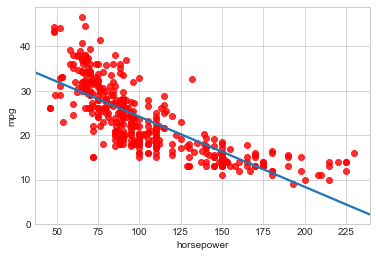

In [9]:
sns.regplot(auto['horsepower'], auto['mpg'], order=1, ci=None,
           scatter_kws = {'color':'r'})

## part(c)

In [10]:
# Construct columns for residual plot
regr = skl_lm.LinearRegression()

# Linear fit
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
regr.fit(X, y)

auto['pred'] = regr.predict(X)
auto['resid'] = auto.mpg - auto.pred

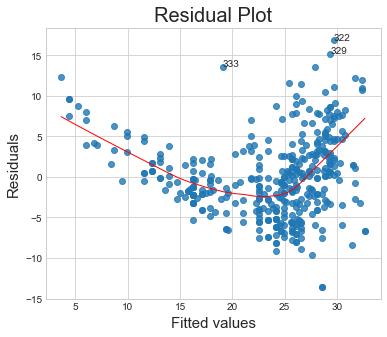

In [11]:
# Residual Plot - Method 1
fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.regplot(auto.pred, auto.resid, lowess=True,
           line_kws={'color':'r', 'lw':1})

ax.set_title('Residual Plot', fontsize=20)
ax.set_xlabel('Fitted values', fontsize=15)
ax.set_ylabel('Residuals', fontsize=15)


# There is a strong indication of non-linearity in the data.

resid_top_3 = np.abs(auto.resid).sort_values(ascending=False)[:3]
for i in resid_top_3.index:
    ax.annotate(i, xy=(auto.pred[i], auto.resid[i]))

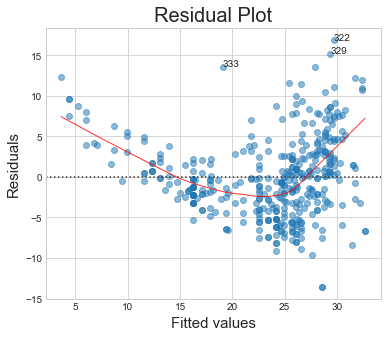

In [12]:
# Residual Plot - Method 2
fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.residplot(auto.pred, 'mpg', data=auto[['mpg','horsepower']],
             lowess=True,
             scatter_kws={'alpha': 0.5},
             line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

ax.set_title('Residual Plot', fontsize=20)
ax.set_xlabel('Fitted values', fontsize=15)
ax.set_ylabel('Residuals', fontsize=15)


# There is a strong indication of non-linearity in the data.

resid_top_3 = np.abs(auto.resid).sort_values(ascending=False)[:3]
for i in resid_top_3.index:
    ax.annotate(i, xy=(auto.pred[i], auto.resid[i]))

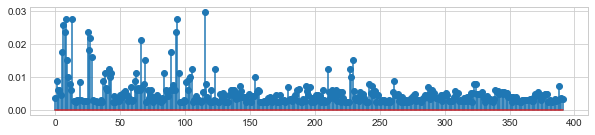

In [13]:
# To inspect further, Find leverage points.
influence = est.get_influence()
hat = influence.hat_matrix_diag
plt.figure(figsize=(10,2))
plt.stem(hat)
plt.show()

# There are no points with high leverage.

In [14]:
# Reload auto for future use.
auto = pd.read_csv('../Data/Auto.csv', na_values='?').dropna()

## 9.
## (a)

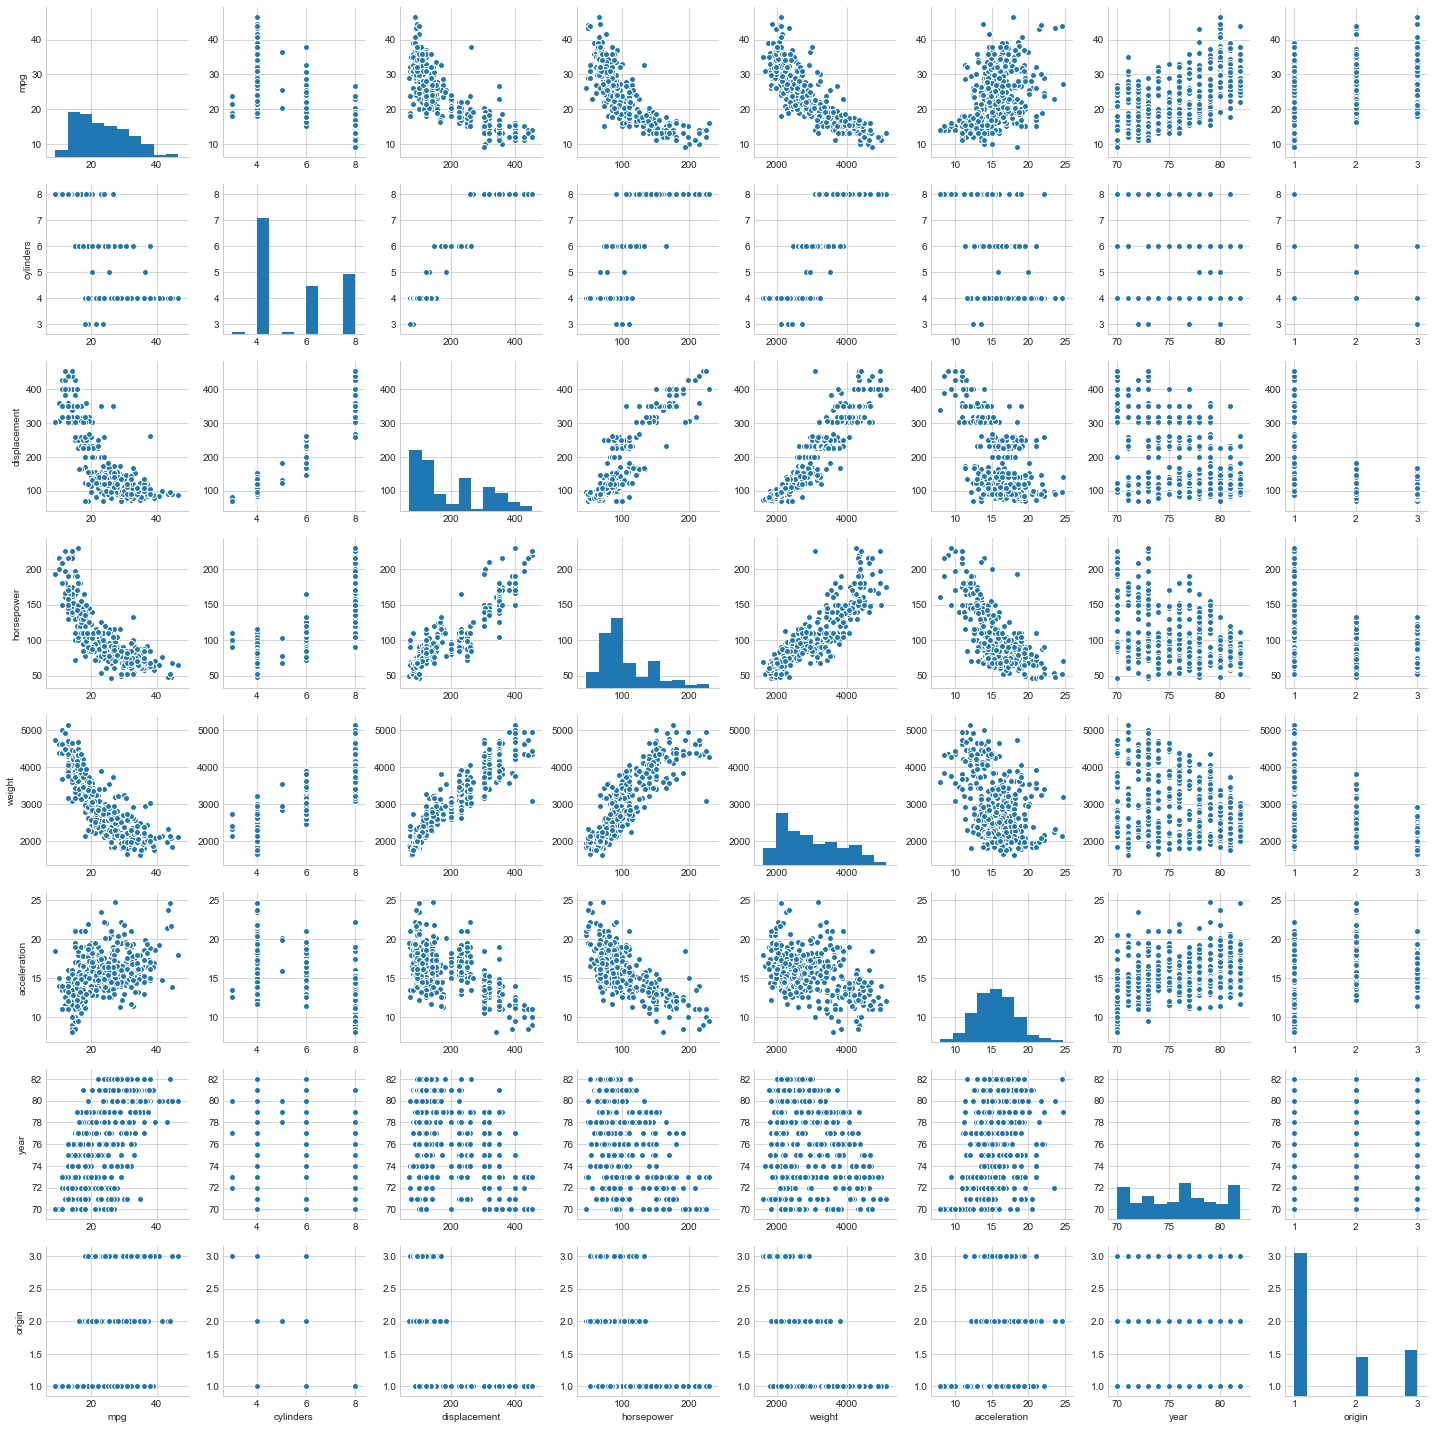

In [15]:
sns.pairplot(auto)

## (b)

In [16]:
auto.drop('name',axis=1).corr()

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

## (c)

In [17]:
est2 = smf.ols('mpg ~ horsepower + cylinders + displacement + \
              horsepower + weight + acceleration + year + origin ', auto).fit()
est2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-17.2184,4.644,-3.707,0.000,-26.350,-8.087
horsepower,-0.0170,0.014,-1.230,0.220,-0.044,0.010
cylinders,-0.4934,0.323,-1.526,0.128,-1.129,0.142
displacement,0.0199,0.008,2.647,0.008,0.005,0.035
weight,-0.0065,0.001,-9.929,0.000,-0.008,-0.005
acceleration,0.0806,0.099,0.815,0.415,-0.114,0.275
year,0.7508,0.051,14.729,0.000,0.651,0.851
origin,1.4261,0.278,5.127,0.000,0.879,1.973


i. There is a relationship between the predictos and the response.

ii. `displacement`, `weight`, `year`, and `origin` appear to have a statistically significant relationship.

iii. +0.75 coefficient for `year` suggests that newer models have a better mpg than older models.

## part(d)
### 분석의 진단 결과를 알기 위해 여러가지 플롯을 그리는 방법을 알아보자.

** Residual Plot **

잔차를 분석함으로서 모형에 포함된 변수로는 파악하지 못했던 관계 등을 찾아낼 수 있다. 가장 이상적인 결과는 잔차들에 어떠한 관계도 존재하지 않는 것이다.

In [18]:
# Construct columns for Residual Plot
regr = skl_lm.LinearRegression()

# Linear fit
X = auto.drop(['mpg','name'], axis=1)
y = auto.mpg
regr.fit(X, y)

auto['pred'] = regr.predict(X)
auto['resid'] = auto.mpg - auto.pred

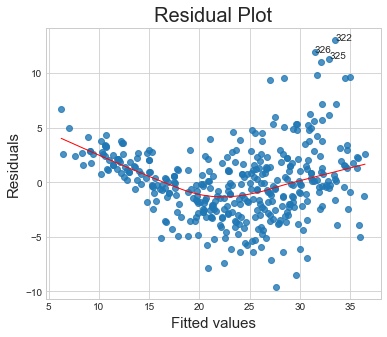

In [19]:
# Residual Plot - Method 1
fig, ax1 = plt.subplots(1,1,figsize=(6,5))
sns.regplot(auto.pred, auto.resid, lowess=True,
           line_kws={'color':'r', 'lw':1}, ax=ax1)

ax1.set_title('Residual Plot', fontsize=20)
ax1.set_xlabel('Fitted values', fontsize=15)
ax1.set_ylabel('Residuals', fontsize=15)

# annotations
resid_top_3 = np.abs(auto.resid).sort_values(ascending=False)[:3]
for i in resid_top_3.index:
    ax1.annotate(i, xy=(auto.pred[i], auto.resid[i]))

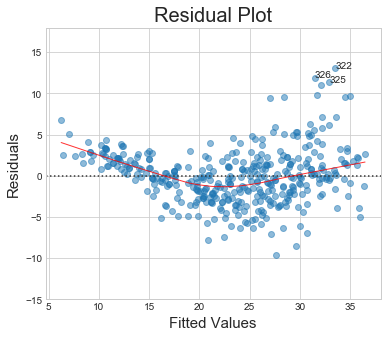

In [20]:
# Residual Plot - Method 2
fig, ax1 = plt.subplots(1,1,figsize=(6,5))

sns.residplot(auto.pred, 'mpg', data=auto.drop('name',axis=1),
              lowess=True, scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw':1, 'alpha':0.8},
              ax=ax1)

ax1.set_title("Residual Plot", fontsize=20)
ax1.set_xlabel("Fitted Values", fontsize=15)
ax1.set_ylabel("Residuals", fontsize=15)
ax1.set_ylim([-15,18])

# annotations
resid_top_3 = np.abs(auto.resid).sort_values(ascending=False)[:3]
for i in resid_top_3.index:
    ax1.annotate(i, xy=(auto.pred[i], auto.resid[i]))


**레버리지**

레버리지는 H 행렬의 대각원소를 의미한다. 레버리지가 레버리지 평균값의 2~4배보다 크면 레버리지가 크다고 의미하고, 레버리지가 큰 데이터는 추정에 매우 큰 영향을 미치는 값이라 이해할 수 있다. 레버리지를 얻기 위해서는 `result.get_influnece().hat_matrix_diag`를 이용하면 된다.

Text(0,0.5,'Leverages')

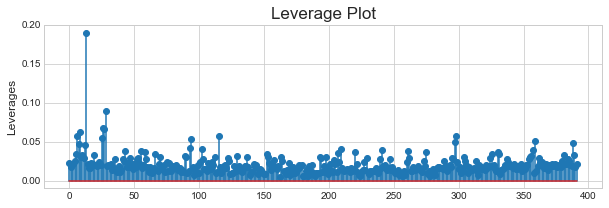

In [21]:
# Get a leverage matrix, H
influence = est2.get_influence()
hat = influence.hat_matrix_diag

fig, ax1 = plt.subplots(1,1,figsize=(10, 3))
plt.stem(hat)

ax1.set_title("Leverage Plot", fontsize=17)
ax1.set_ylabel("Leverages", fontsize=12)

# Clearly, There is a point whose leverage is seriously higher than other ones.

**아웃라이어**

아웃라이어를 확인하기 위해서 Studentized Residual이 3보다 큰 데이터를 찾는 방법을 이용해보자. StatsModels를 사용한 경우, `result.resid_pearson`에 Studentized Residual이 있다.

Text(0,0.5,'Studentied Resid')

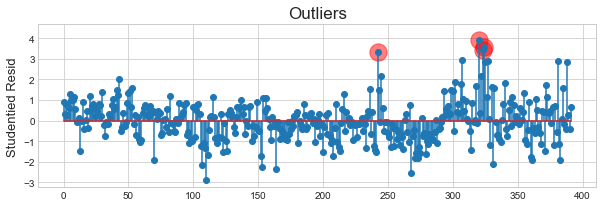

In [22]:
# To see if there are outliers, You can inspect studentized residuals.
resid = Series(est2.resid_pearson)

fig, ax1 = plt.subplots(1,1,figsize=(10, 3))
plt.stem(resid)
idx = np.abs(resid) > 3
plt.scatter(resid[idx].index, resid[idx], c='r', s=300, alpha=0.5)

ax1.set_title("Outliers", fontsize=17)
ax1.set_ylabel("Studentied Resid", fontsize=13)

# Clearly, There are some outliars with studentized residuals
# higher than 3.

**Cook's Distance**

레버리지와 잔차를 동시에 볼 때는 `plot_leverage_resid2` 를 이용하면 된다. Cook's Distance는 레버리지와 잔차에 비례하는 값이고, 이 값을 기준으로 레버리지와 잔차가 모두 큰 데이터를 판별하기도 한다.

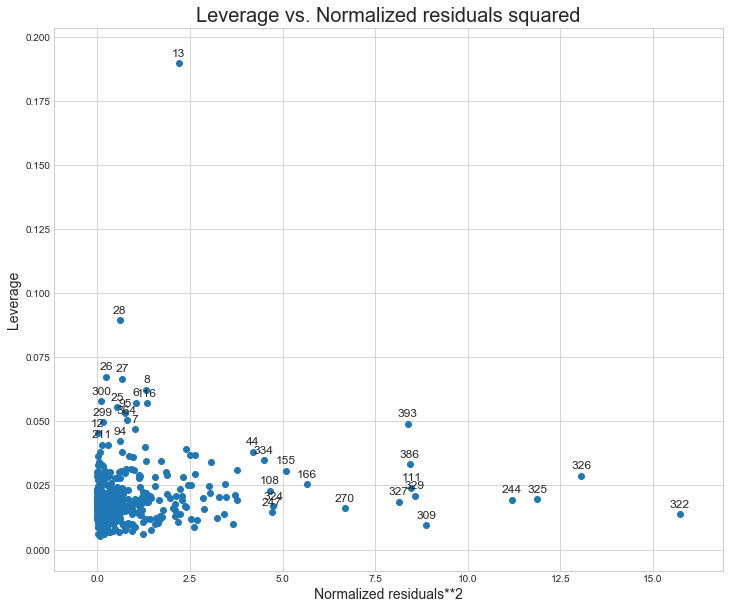

In [23]:
fig, ax1 = plt.subplots(1,1,figsize=(12,10))
sm.graphics.plot_leverage_resid2(est2, ax=ax1)
ax1.set_title("Leverage vs. Normalized residuals squared", fontsize=20)
ax1.set_xlabel("Normalized residuals**2", fontsize=14)
ax1.set_ylabel("Leverage", fontsize=14)

plt.show()

`influence_plot`을 이용하면 점의 크기를 통해 Cook's distance가 표현된다.

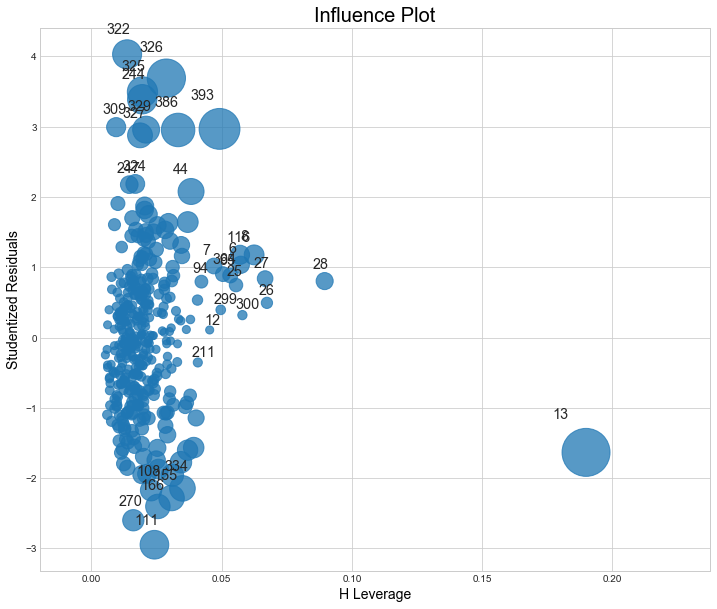

In [24]:
fig, ax1 = plt.subplots(1,1,figsize=(12,10))
sm.graphics.influence_plot(est2, ax=ax1)

ax1.set_title("Influence Plot", fontsize=20)
ax1.set_xlabel("H Leverage", fontsize=14)
ax1.set_ylabel("Studentized Residuals", fontsize=14)

plt.show()

## part(e)

In [25]:
lm1 = smf.ols('mpg ~ displacement+ weight + \
               year + origin ', auto).fit()
lm1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-18.6065,4.028,-4.620,0.000,-26.526,-10.687
displacement,0.0056,0.005,1.172,0.242,-0.004,0.015
weight,-0.0066,0.001,-11.802,0.000,-0.008,-0.005
year,0.7714,0.050,15.486,0.000,0.673,0.869
origin,1.2262,0.267,4.593,0.000,0.701,1.751


In [26]:
lm2 = smf.ols('mpg ~ displacement+ weight + \
               year * origin ', auto).fit()
lm2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.9270,8.873,0.893,0.372,-9.519,25.373
displacement,0.0016,0.005,0.319,0.750,-0.008,0.011
weight,-0.0064,0.001,-11.571,0.000,-0.007,-0.005
year,0.4313,0.113,3.818,0.000,0.209,0.653
origin,-14.4936,4.707,-3.079,0.002,-23.749,-5.239
year:origin,0.2023,0.060,3.345,0.001,0.083,0.321


In [27]:
lm3 = smf.ols('mpg ~ displacement+ weight * \
               year + origin ', auto).fit()
lm3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-107.6004,12.904,-8.339,0.000,-132.971,-82.229
displacement,-0.0004,0.005,-0.088,0.930,-0.009,0.009
weight,0.0260,0.005,5.722,0.000,0.017,0.035
year,1.9624,0.172,11.436,0.000,1.625,2.300
weight:year,-0.0004,5.97e-05,-7.214,0.000,-0.001,-0.000
origin,0.9116,0.255,3.579,0.000,0.411,1.412


In [28]:
lm4 = smf.ols('mpg ~ displacement * weight + \
               year + origin ', auto).fit()
lm4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-8.0068,3.798,-2.108,0.036,-15.474,-0.540
displacement,-0.0715,0.009,-7.790,0.000,-0.090,-0.053
weight,-0.0105,0.001,-16.146,0.000,-0.012,-0.009
displacement:weight,2.104e-05,2.21e-06,9.506,0.000,1.67e-05,2.54e-05
year,0.8194,0.045,18.136,0.000,0.731,0.908
origin,0.3567,0.257,1.386,0.167,-0.149,0.863


## part(f)

In [29]:
lm1 = smf.ols('mpg ~ horsepower + np.power(horsepower,2)', auto).fit()
lm1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
"np.power(horsepower, 2)",0.0012,0.000,10.080,0.000,0.001,0.001


In [30]:
lm2 = smf.ols('mpg ~ np.log(horsepower)', auto).fit()
lm2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,108.6997,3.050,35.644,0.000,102.704,114.695
np.log(horsepower),-18.5822,0.663,-28.034,0.000,-19.885,-17.279


In [31]:
lm3 = smf.ols('mpg ~ np.sqrt(horsepower)', auto).fit()
lm3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,58.7052,1.349,43.516,0.000,56.053,61.358
np.sqrt(horsepower),-3.5035,0.132,-26.544,0.000,-3.763,-3.244


## 10.
## (a)

In [32]:
carseats = pd.read_csv('../Data/Carseats.csv')
carseats.head()

   Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price  \
0           1   9.50        138      73           11         276    120   
1           2  11.22        111      48           16         260     83   
2           3  10.06        113      35           10         269     80   
3           4   7.40        117     100            4         466     97   
4           5   4.15        141      64            3         340    128   

  ShelveLoc  Age  Education Urban   US  
0       Bad   42         17   Yes  Yes  
1      Good   65         10   Yes  Yes  
2    Medium   59         12   Yes  Yes  
3    Medium   55         14   Yes  Yes  
4       Bad   38         13   Yes   No  

In [33]:
lm1= smf.ols('Sales ~ Price + Urban + US', carseats).fit()
for i in range(3):
    print(lm1.summary().tables[i])

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 14 Jan 2018   Prob (F-statistic):           2.39e-23
Time:                        13:51:56   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

## (b)
Price: 다른 변수가 동일할 때, Price 1단위가 증가하면 `Sales`는 0.05 하락한다.

Urban: 다른 변수가 동일할 때, Urban 지역의 경우 `Sales` 평균이 0.02 낮다.

US: 다른 변수가 동일할 때, 미국의 경우 `Sales` 평균이 1.2 높다.

## (c)
`Sales = 13.04-0.02*Urban[T.Yes]+1.2*US[T.Yes]-0.05*Price`

## (d)
I can reject the null hypothesis for `US[T.Yes]` and `Price` since their p-values are very low.

## (e)

In [34]:
lm2 = smf.ols('Sales ~ Price +  US', carseats).fit()
for i in range(3):
    print(lm2.summary().tables[i])

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 14 Jan 2018   Prob (F-statistic):           2.66e-24
Time:                        13:51:56   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

## (f)
위의 결과를 보면 `Price`와 `US` 만을 사용한 모형의 Adj. R-squared가 아주 미세하게 높음을 알 수 있으나 큰 차이는 없다.

## (g)
CI for `US[T.Yes]` = (0.692, 1.708)
CI for `Price` = (-0.065, -0.044)

## (h)
**레버리지**

아래의 플롯을 보면 high leverage observation이 딱히 존재하지 않음을 알 수 있다.

Text(0,0.5,'Leverages')

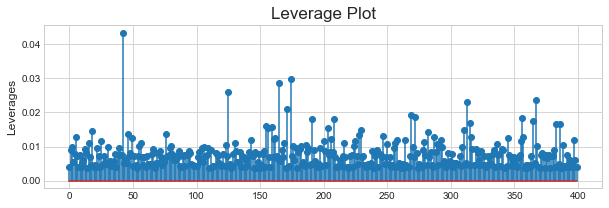

In [35]:
# Get a leverage matrix, H
influence = lm2.get_influence()
hat = influence.hat_matrix_diag

fig, ax1 = plt.subplots(1,1,figsize=(10, 3))
plt.stem(hat)

ax1.set_title("Leverage Plot", fontsize=17)
ax1.set_ylabel("Leverages", fontsize=12)

**아웃라이어**

Studentized Residual이 3을 넘는 데이터는 존재하지 않고, 기준을 넉넉하게 2.5로 설정하면 5개의 데이터를 아웃라이어로 의심해볼 수 있다.

(-4, 4)

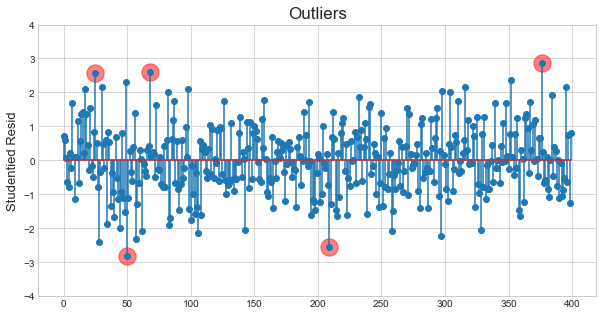

In [36]:
###### To see if there are outliers, You can inspect studentized residuals.
resid = Series(lm2.resid_pearson)

fig, ax1 = plt.subplots(1,1,figsize=(10, 5))
ax1.stem(resid)
idx = np.abs(resid) > 2.5
plt.scatter(resid[idx].index, resid[idx], c='r', s=300, alpha=0.5)

ax1.set_title("Outliers", fontsize=17)
ax1.set_ylabel("Studentied Resid", fontsize=13)
ax1.set_ylim([-4,4])

## 11
## (a)

In [37]:
np.random.seed(514123)
x = np.random.randn(100)
y = 2*x+np.random.randn(100)
data = DataFrame({'x':x, 'y':y})

In [38]:
lm1 = smf.ols('y ~ x + 0', data).fit()
lm1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
x,2.1606,0.100,21.613,0.000,1.962,2.359


## (b)

In [39]:
lm2 = smf.ols('x ~ y + 0', data).fit()
lm2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
y,0.3819,0.018,21.613,0.000,0.347,0.417


## (c)
Coefficient for x in (a) is the reciprocal of coefficient for y in (b). See next code

In [40]:
# This should be 1 originally. But.....
lm1.params[0] * lm2.params[0]

0.82512730686364444

## (e)
Nothing changes if i exchange x with y in (d). So t-statistic is same for x~y and y~x

## (f)
You can see that t-statistics for both models are same in lm1, lm2

In [41]:
lm1 = smf.ols('y ~ x', data).fit()
lm1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0436,0.097,-0.449,0.655,-0.237,0.149
x,2.1533,0.102,21.179,0.000,1.952,2.355


In [42]:
lm2 = smf.ols('y ~ x', data).fit()
lm2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0436,0.097,-0.449,0.655,-0.237,0.149
x,2.1533,0.102,21.179,0.000,1.952,2.355


# 12
## (a)
When the sum of squares of the y values is equal to the sum of squares of the x values, coefficient estimates are the same of both of them.

## (b)

In [43]:
x = np.random.randn(100)
y = x * 2 + np.random.randn(100)*0.05

data = DataFrame({'x':x , 'y':y})

In [44]:
lm1 = smf.ols('y ~ x + 0', data).fit()
lm1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
x,1.9997,0.005,412.623,0.000,1.990,2.009


In [45]:
lm2 = smf.ols('x ~ y + 0', data).fit()
lm2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
y,0.4998,0.001,412.623,0.000,0.497,0.502


In [46]:
np.power(x,2).sum()

104.71165680773761

In [47]:
np.power(y,2).sum()

418.95497044885144

## (c)

In [48]:
x = np.random.randn(100)
y = -x + np.random.randn(100)*0.05

data = DataFrame({'x':x, 'y':y})

In [49]:
lm1 = smf.ols('y ~ x + 0', data).fit()
lm1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
x,-1.0044,0.006,-182.239,0.000,-1.015,-0.993


In [50]:
lm2 = smf.ols('x ~ y + 0', data).fit()
lm2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
y,-0.9927,0.005,-182.239,0.000,-1.003,-0.982


In [51]:
np.power(x,2).sum()

87.795598580071157

In [52]:
np.power(y,2).sum()

88.833787857288698

# 13
## (a)

In [53]:
np.random.seed(1)
x = np.random.randn(100)

## (b)

In [54]:
eps = np.random.randn(100) * 0.5

## (c)

In [55]:
y = -1 + 0.5*x + eps

Length of y is 100

$\beta_0$ is -1, $\beta_1$ is 0.5

## (d)

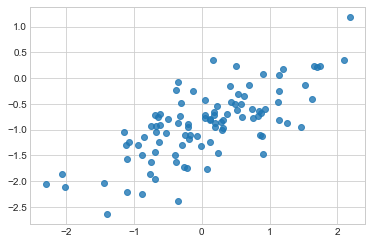

In [56]:
sns.regplot(x=x,y=y, fit_reg=False)

## (e)

In [57]:
data = DataFrame({'y':y, 'x':x})
lm = smf.ols('y ~ x', data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sun, 14 Jan 2018   Prob (F-statistic):           2.20e-17
Time:                        13:51:58   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9265      0.047    -19.717      0.000      -1.020      -0.833
x              0.5477      0.053     10.342      0.000       0.443       0.653
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\hat{\beta_0}$ is -0.9265, which is higher than $\hat{\beta_0} = -1$

$\hat{\beta_1}$ is 0.5477, which is higher than $\hat{\beta_1} = 0.5$

## (f)

In [58]:
# Generate points for population regression line
x2 = np.linspace(np.min(x),np.max(x),20)
y2 = -1 + 0.5*x2

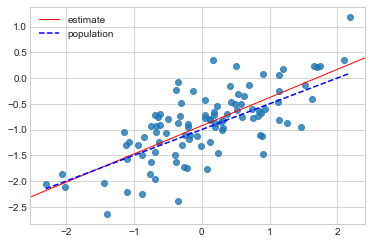

In [59]:
sns.regplot(x=x,y=y, fit_reg=True, ci=None,
           line_kws={'color':'r', 'lw':1, 'label':'estimate'})
plt.plot(x2,y2, 'b--', label='population')
plt.legend(loc='best')

## (g)

In [60]:
lm2 = smf.ols('y ~ x + np.power(x,2)', data).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Sun, 14 Jan 2018   Prob (F-statistic):           2.83e-16
Time:                        13:51:58   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9325      0.058    -16.158      0.000      -1.047      -0.818
x                  0.5468      0.053     10.229      0.000       0.441       0.653
np.power(x, 2)     0.0077      0.043      0.181      0.856      -0.077       0.092
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is no evidence for improvement. Also, p-value of the $\hat{\beta_2}$ suggests that there isn't a relationship between $y$ and $x^{2}$

## (h), (i), (j)
Do it yourself.

# 14
## (a)

In [61]:
np.random.seed(1)
x1 = np.random.uniform(0,1,size=100)
x2 = 0.5*x1 + (np.random.randn(100)/10)
y = 2 + (2*x1) + (0.3*x2) + np.random.randn(100)
data = DataFrame({'y':y, 'x1':x1, 'x2':x2})

$Y = 2 + 2X_{1} + 0.3X_{2} + \epsilon$

$\beta_{0}=2, \beta_{1}=2, \beta_{2}=0.3$

## (b)

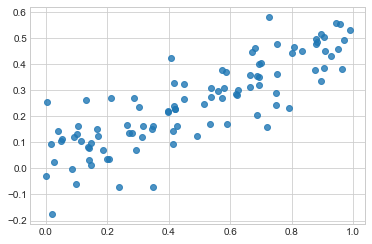

In [62]:
sns.regplot(x1, x2, fit_reg=False)

## (c)

In [63]:
lm = smf.ols('y ~ x1 + x2', data).fit()
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.1893,0.199,11.021,0.000,1.795,2.584
x1,0.7046,0.637,1.107,0.271,-0.559,1.968
x2,2.5024,1.140,2.194,0.031,0.239,4.766


$\hat{\beta_1}$ and $\hat{\beta_2}$ are seriously not close to true coefficients. I can't reject the null hypothesis $H_{0}$ for $\hat{\beta_1}$ since its p-value is 0.271

## (d)

In [64]:
lm = smf.ols('y ~ x1', data).fit()
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.2486,0.201,11.209,0.000,1.850,2.647
x1,1.8770,0.353,5.316,0.000,1.176,2.578


I can reject the null hypothesis $H_{0}: \beta_{1}=0$

## (e)

In [65]:
lm = smf.ols('y ~ x2', data).fit()
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.2655,0.187,12.145,0.000,1.895,2.636
x2,3.5613,0.621,5.733,0.000,2.329,4.794


I can reject the null hypothesis $H_{0}: \beta_{1}=0$

## (f)
No. Since $X_{1}$ and $X_{2}$ are correlated linearly with each other, it's very hard to distinguish their effects when regressed upon both of them. But when they are regressed upon seperately, their effect on $Y$ can be indicated more easily.
## (g)

In [66]:
x1 = np.append(x1,0.1)
x2 = np.append(x2,0.8)
y = np.append(y,6)
matrix = DataFrame({'y':y, 'x1':x1, 'x2':x2})
print(x1.shape, x2.shape, y.shape)

(101,) (101,) (101,)


In [67]:
lm1 = smf.ols('y ~ x1 + x2', matrix).fit()
lm1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.1996,0.199,11.041,0.000,1.804,2.595
x1,0.2200,0.520,0.423,0.673,-0.812,1.252
x2,3.4392,0.892,3.857,0.000,1.670,5.209


In [68]:
lm2 = smf.ols('y ~ x1', matrix).fit()
lm2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.3583,0.208,11.331,0.000,1.945,2.771
x1,1.7225,0.368,4.679,0.000,0.992,2.453


In [69]:
lm3 = smf.ols('y ~ x2', matrix).fit()
lm3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.2331,0.182,12.271,0.000,1.872,2.594
x2,3.7216,0.589,6.324,0.000,2.554,4.889


Just one point has changed almost all coefficients of estimations. See Residual plots for every regressions.

In [70]:
matrix['pred1'] = lm1.predict(matrix[['x1','x2']])
matrix['pred2'] = lm2.predict(matrix[['x1']])
matrix['pred3'] = lm3.predict(matrix[['x2']])

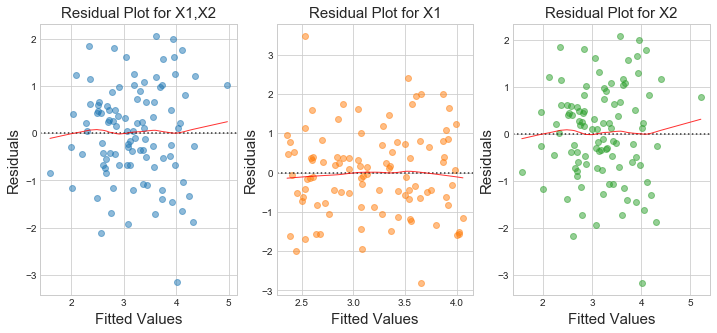

In [71]:
# Residual Plots
fig, axes = plt.subplots(1,3,figsize=(12,5))

sns.residplot(matrix.pred1, 'y', data=matrix[['x1','x2','y']],
              lowess=True, scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw':1, 'alpha':0.8},
              ax=axes[0])
axes[0].set_title("Residual Plot for X1,X2", fontsize=15)

sns.residplot(matrix.pred2, 'y', data=matrix[['x1','y']],
              lowess=True, scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw':1, 'alpha':0.8},
              ax=axes[1])
axes[1].set_title("Residual Plot for X1", fontsize=15)

sns.residplot(matrix.pred3, 'y', data=matrix[['x2','y']],
              lowess=True, scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw':1, 'alpha':0.8},
              ax=axes[2])
axes[2].set_title("Residual Plot for X2", fontsize=15)

for i in range(3):
    axes[i].set_xlabel("Fitted Values", fontsize=15)
    axes[i].set_ylabel("Residuals", fontsize=15)


Text(0.5,0.98,'Leverage Plots')

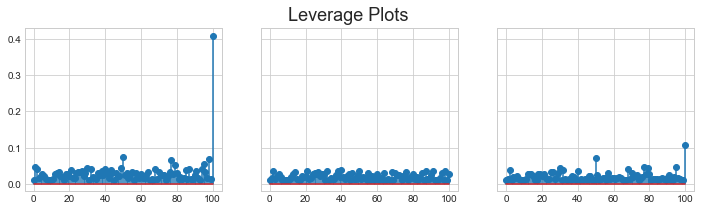

In [72]:
# Get a leverage matrix, H
influence = lm1.get_influence()
hat1 = influence.hat_matrix_diag

influence = lm2.get_influence()
hat2 = influence.hat_matrix_diag

influence = lm3.get_influence()
hat3 = influence.hat_matrix_diag

fig, axes = plt.subplots(1,3,figsize=(12, 3), sharey=True)
axes[0].stem(hat1)
axes[1].stem(hat2)
axes[2].stem(hat3)

fig.suptitle("Leverage Plots", fontsize=18)

Text(0.5,0.98,'Studentized Residuals Plot')

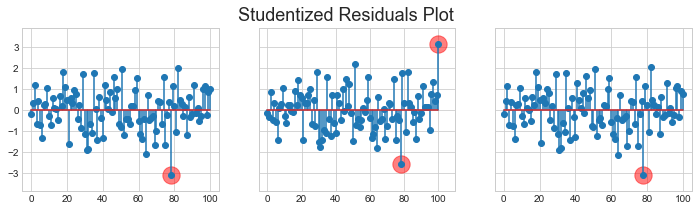

In [73]:
resid1 = Series(lm1.resid_pearson)
resid2 = Series(lm2.resid_pearson)
resid3 = Series(lm3.resid_pearson)

fig, axes = plt.subplots(1,3,figsize=(12, 3), sharey=True)
axes[0].stem(resid1)
axes[1].stem(resid2)
axes[2].stem(resid3)
idx1 = np.abs(resid1) > 2.5
idx2 = np.abs(resid2) > 2.5
idx3 = np.abs(resid3) > 2.5

axes[0].scatter(resid1[idx1].index, resid1[idx1], c='r', s=300, alpha=0.5)
axes[1].scatter(resid2[idx2].index, resid2[idx2], c='r', s=300, alpha=0.5)
axes[2].scatter(resid3[idx3].index, resid3[idx3], c='r', s=300, alpha=0.5)

fig.suptitle("Studentized Residuals Plot", fontsize=18)

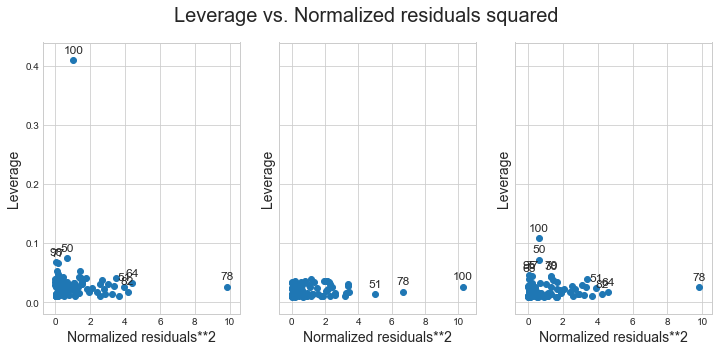

In [74]:
fig, axes = plt.subplots(1,3,figsize=(12,5), sharey= True)
sm.graphics.plot_leverage_resid2(lm1, ax=axes[0])
sm.graphics.plot_leverage_resid2(lm2, ax=axes[1])
sm.graphics.plot_leverage_resid2(lm3, ax=axes[2])
fig.suptitle("Leverage vs. Normalized residuals squared", fontsize=20)
for i in range(3):
    axes[i].set_xlabel("Normalized residuals**2", fontsize=14)
    axes[i].set_ylabel("Leverage", fontsize=14)
    axes[i].set_title("")

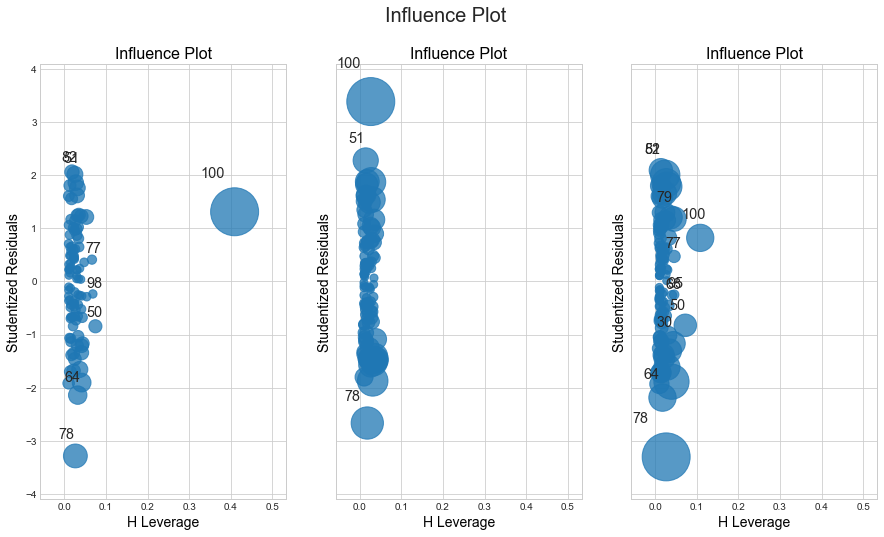

In [75]:
fig, axes = plt.subplots(1,3,figsize=(15,8), sharex=True, sharey=True)
sm.graphics.influence_plot(lm1, ax=axes[0])
sm.graphics.influence_plot(lm2, ax=axes[1])
sm.graphics.influence_plot(lm3, ax=axes[2])

fig.suptitle("Influence Plot", fontsize=20)

for i in range(3):
    axes[i].set_xlabel("H Leverage", fontsize=14)
    axes[i].set_ylabel("Studentized Residuals", fontsize=14)

# 15
## (b)

In [76]:
boston = pd.read_csv("../Data/Boston.csv")

In [77]:
boston.describe()

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## Method 1
처음엔 무식하게 하나씩 다 하는 방법을 이용하였다

In [78]:
# Yes
lm1 = smf.ols('crim ~ zn', boston).fit()
lm1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.4537,0.417,10.675,0.000,3.634,5.273
zn,-0.0739,0.016,-4.594,0.000,-0.106,-0.042


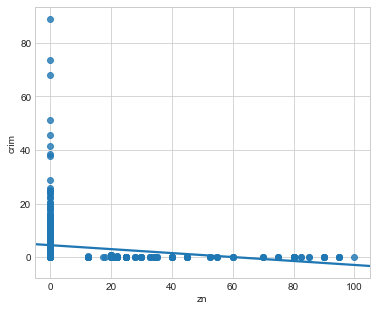

In [79]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.regplot(boston['zn'],boston['crim'],ci=None, ax=ax)

In [80]:
# Yes
lm2 = smf.ols('crim ~ indus', boston).fit()
lm2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.0637,0.667,-3.093,0.002,-3.375,-0.753
indus,0.5098,0.051,9.991,0.000,0.410,0.610


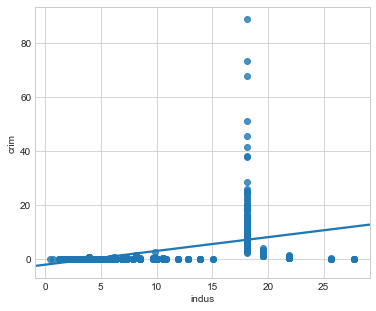

In [81]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.regplot(boston['indus'],boston['crim'],ci=None, ax=ax)

In [82]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [83]:
# No
lm3 = smf.ols('crim ~ chas', boston).fit()
lm3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.7444,0.396,9.453,0.000,2.966,4.523
chas,-1.8928,1.506,-1.257,0.209,-4.852,1.066


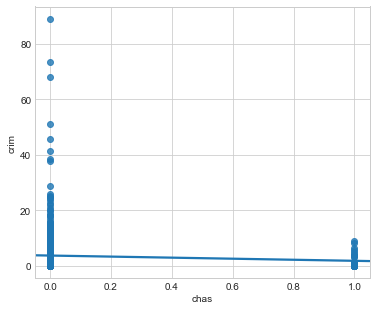

In [84]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.regplot(boston['chas'],boston['crim'],ci=None, ax=ax)

In [85]:
# Yes
lm4 = smf.ols('crim ~ nox', boston).fit()
lm4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-13.7199,1.699,-8.073,0.000,-17.059,-10.381
nox,31.2485,2.999,10.419,0.000,25.356,37.141


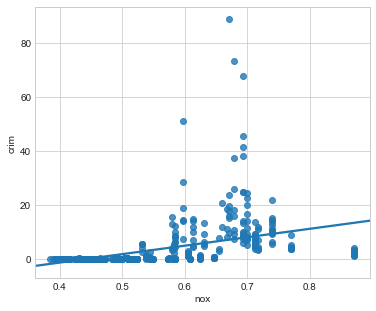

In [86]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.regplot(boston['nox'],boston['crim'],ci=None, ax=ax)

In [87]:
# Yes
lm5 = smf.ols('crim ~ rm', boston).fit()
lm5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,20.4818,3.364,6.088,0.000,13.872,27.092
rm,-2.6841,0.532,-5.045,0.000,-3.729,-1.639


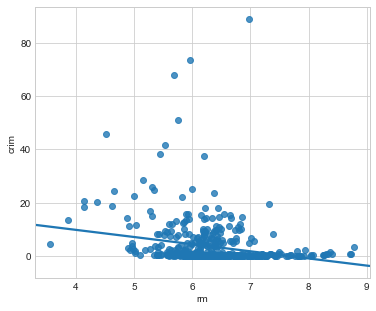

In [88]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.regplot(boston['rm'],boston['crim'],ci=None, ax=ax)

In [89]:
# Yes
lm6 = smf.ols('crim ~ age', boston).fit()
lm6.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-3.7779,0.944,-4.002,0.000,-5.633,-1.923
age,0.1078,0.013,8.463,0.000,0.083,0.133


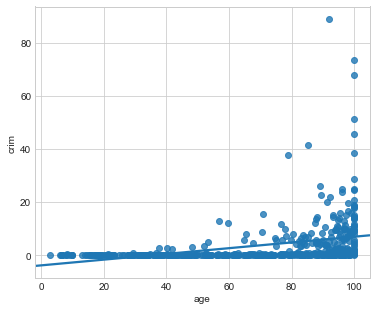

In [90]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.regplot(boston['age'],boston['crim'],ci=None, ax=ax)

In [91]:
# Yes
lm7 = smf.ols('crim ~ dis', boston).fit()
lm7.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.4993,0.730,13.006,0.000,8.064,10.934
dis,-1.5509,0.168,-9.213,0.000,-1.882,-1.220


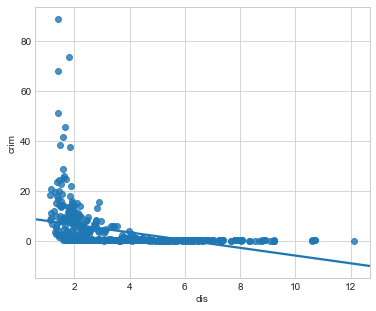

In [92]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.regplot(boston['dis'],boston['crim'],ci=None, ax=ax)

In [93]:
# Yes
lm8 = smf.ols('crim ~ rad', boston).fit()
lm8.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.2872,0.443,-5.157,0.000,-3.158,-1.416
rad,0.6179,0.034,17.998,0.000,0.550,0.685


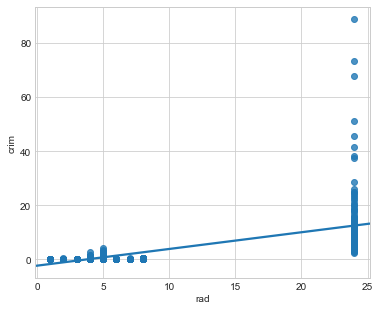

In [94]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.regplot(boston['rad'],boston['crim'],ci=None, ax=ax)

In [95]:
# Yes
lm9 = smf.ols('crim ~ tax', boston).fit()
lm9.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-8.5284,0.816,-10.454,0.000,-10.131,-6.926
tax,0.0297,0.002,16.099,0.000,0.026,0.033


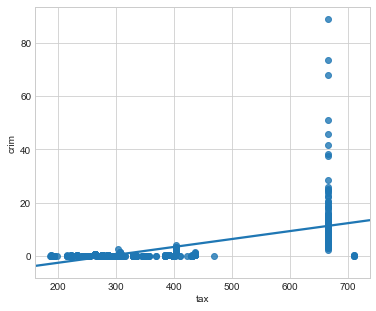

In [96]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.regplot(boston['tax'],boston['crim'],ci=None, ax=ax)

In [97]:
# Yes
lm10 = smf.ols('crim ~ ptratio', boston).fit()
lm10.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-17.6469,3.147,-5.607,0.000,-23.830,-11.464
ptratio,1.1520,0.169,6.801,0.000,0.819,1.485


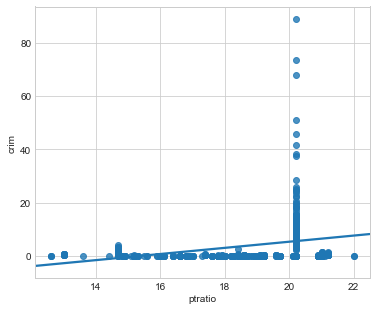

In [98]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.regplot(boston['ptratio'],boston['crim'],ci=None, ax=ax)

In [99]:
# Yes
lm11 = smf.ols('crim ~ black', boston).fit()
lm11.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,16.5535,1.426,11.609,0.000,13.752,19.355
black,-0.0363,0.004,-9.367,0.000,-0.044,-0.029


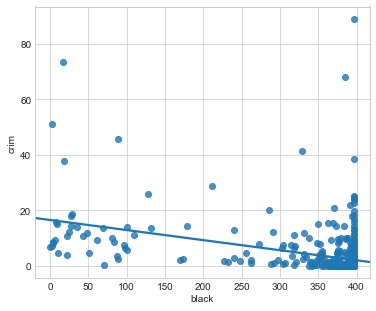

In [100]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.regplot(boston['black'],boston['crim'],ci=None, ax=ax)

In [101]:
# Yes
lm12 = smf.ols('crim ~ lstat', boston).fit()
lm12.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-3.3305,0.694,-4.801,0.000,-4.694,-1.968
lstat,0.5488,0.048,11.491,0.000,0.455,0.643


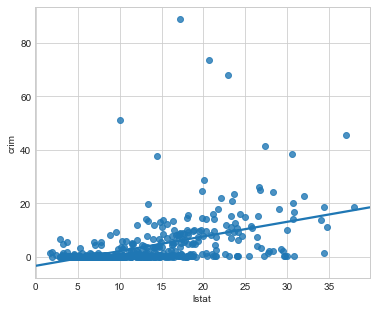

In [102]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.regplot(boston['lstat'],boston['crim'],ci=None, ax=ax)

In [103]:
# Yes
lm13 = smf.ols('crim ~ medv', boston).fit()
lm13.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,11.7965,0.934,12.628,0.000,9.961,13.632
medv,-0.3632,0.038,-9.460,0.000,-0.439,-0.288


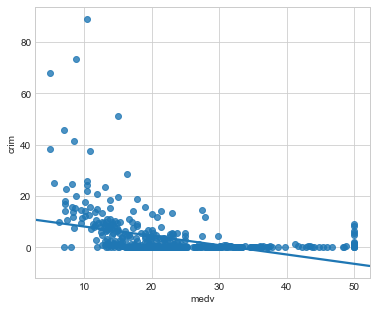

In [104]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.regplot(boston['medv'],boston['crim'],ci=None, ax=ax)

All predictors except `chas` is statistically significant.

## Method 2 - apply 활용
regress 함수를 정의하여 apply 메소드로 한번에 모든 결과값을 얻고 표와 플롯을 출력해보자.

In [105]:
def regress(data, y):
    y1 = y
    X1 = data
    data = DataFrame({'y':y1, 'X':X1})
    lm = smf.ols('y ~ X', data).fit()
    return lm

In [106]:
result = boston.drop('crim',axis=1).apply(regress, y=boston['crim'])

In [107]:
predictors = boston.columns[1:]
for i in range(len(result)):
    print('Regression Result for', predictors[i])
    print(result[i].summary().tables[1])
    print('\n')

Regression Result for zn
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      0.000       3.634       5.273
X             -0.0739      0.016     -4.594      0.000      -0.106      -0.042


Regression Result for indus
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0637      0.667     -3.093      0.002      -3.375      -0.753
X              0.5098      0.051      9.991      0.000       0.410       0.610


Regression Result for chas
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7444      0.396      9.453      0.000       2.966       4.523
X             -1.8928      1.506     -1.257    

이제 for문을 이용하여 한번에 그림을 모두 그려보자.

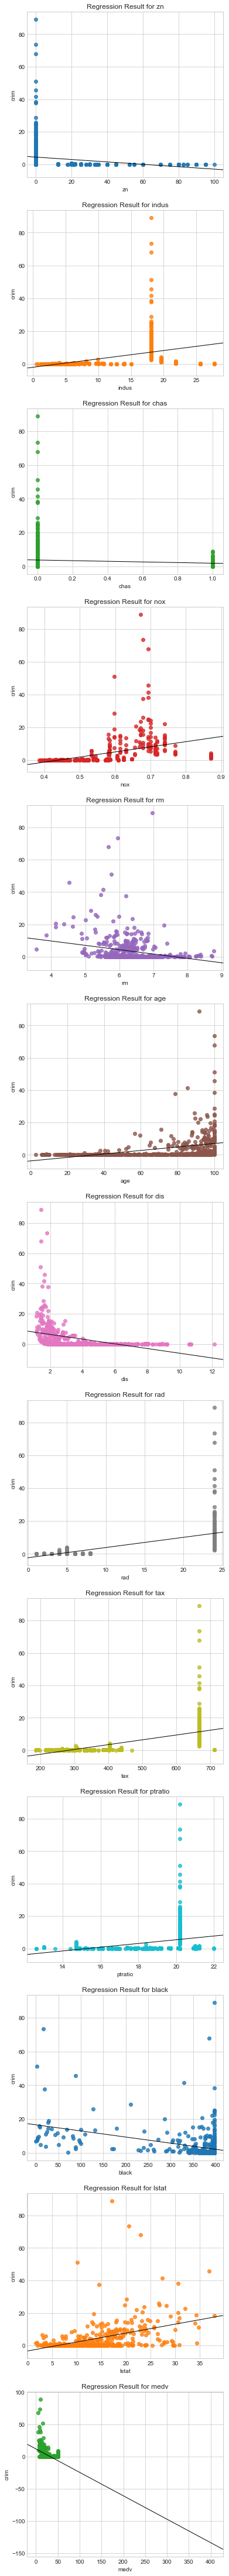

In [108]:
fig, axes = plt.subplots(len(predictors),1, figsize=(6,80))
for i in range(len(predictors)):
    sns.regplot(boston[str(predictors[i])],boston['crim'], ci=None, ax=axes[i], line_kws={'color':'k', 'lw':1})
    axes[i].set_title("Regression Result for " + str(predictors[i]))

## (b)

In [109]:
lm_all = smf.ols('crim ~ zn + indus + chas + nox + rm + age + dis \
                  + rad + tax + ptratio + black + lstat + medv', boston).fit()
lm_all.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,17.0332,7.235,2.354,0.019,2.818,31.248
zn,0.0449,0.019,2.394,0.017,0.008,0.082
indus,-0.0639,0.083,-0.766,0.444,-0.228,0.100
chas,-0.7491,1.180,-0.635,0.526,-3.068,1.570
nox,-10.3135,5.276,-1.955,0.051,-20.679,0.052
rm,0.4301,0.613,0.702,0.483,-0.774,1.634
age,0.0015,0.018,0.081,0.935,-0.034,0.037
dis,-0.9872,0.282,-3.503,0.001,-1.541,-0.433
rad,0.5882,0.088,6.680,0.000,0.415,0.761
tax,-0.0038,0.005,-0.733,0.464,-0.014,0.006


We can reject the null hypothesis $H_{0}:\beta_{j}=0$ for `zn`, `dis`, `rad`, `black`, `medv`.

In [110]:
lm_list = [lm1, lm2, lm3, lm4, lm5, lm6, lm7, lm8, lm9, lm10, lm11,
          lm12, lm13]

In [111]:
uni_coef = Series([lm.params[1] for lm in lm_list])

In [112]:
multi_coef = lm_all.params[1:]

Text(0,0.5,'Multivariate Coefficients')

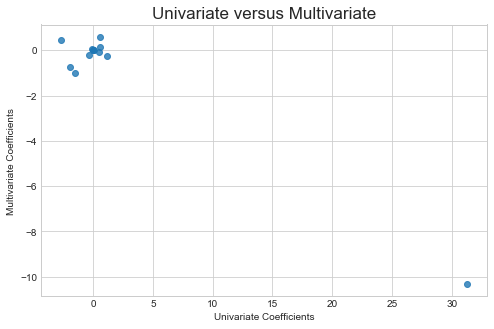

In [113]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
sns.regplot(uni_coef, multi_coef, ci=None, fit_reg=None, ax=ax)
ax.set_title("Univariate versus Multivariate", fontsize=17)
ax.set_xlabel("Univariate Coefficients")
ax.set_ylabel("Multivariate Coefficients")

## (d)
위와 마찬가지 방법으로 apply를 활용하면 원하는 결과를 얻을 수 있다.

In [114]:
def regress_poly(data, y):
    y1 = y
    X1 = data
    data = DataFrame({'y':y1, 'X':X1})
    lm = smf.ols('y ~ X + np.power(X,2) + np.power(X,3)', data).fit()
    return lm

In [115]:
result = boston.drop('crim',axis=1).apply(regress_poly, y=boston['crim'])

In [116]:
predictors = boston.columns[1:]
for i in range(len(result)):
    print('Regression Result for', predictors[i])
    print(result[i].summary().tables[1])
    print('\n')

Regression Result for zn
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.8461      0.433     11.192      0.000       3.995       5.697
X                 -0.3322      0.110     -3.025      0.003      -0.548      -0.116
np.power(X, 2)     0.0065      0.004      1.679      0.094      -0.001       0.014
np.power(X, 3) -3.776e-05   3.14e-05     -1.203      0.230   -9.94e-05    2.39e-05


Regression Result for indus
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.6626      1.574      2.327      0.020       0.570       6.755
X                 -1.9652      0.482     -4.077      0.000      -2.912      -1.018
np.power(X, 2)     0.2519      0.039      6.407      0.000       0.175       0.329
np.power(X, 3)    -0.0070      0